In [2]:
%matplotlib notebook 
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point
import trimesh as triMesh
from stl import mesh as STLmesh
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure



tree = ET.parse("D:/Dropbox/DFCI/data/LIDC-XML-only.tar/LIDC-XML-only/tcia-lidc-xml/157/158.xml")

In [3]:
dataFrame = pd.DataFrame(columns = {'type' , 'id' , 'subtlety' , 'internalStructure' , 'calcification' , 'sphericity' , 'margin',
                                    'lobulation' , 'spiculation' , 'texture' , 'malignancy', 'roiCount' , 'roiList' } )
dataFrame

,type,spiculation,sphericity,calcification,subtlety,malignancy,lobulation,texture,roiCount,roiList,internalStructure,margin,id


In [4]:
# dataFrame to populate
# child (XML node) to search
# dataFrame Id at which to instert
def populateDataFrame(dataFrame, child, Id ):
    charList = [ 'subtlety' , 'internalStructure' , 'calcification' , 'sphericity' , 'margin',
                                    'lobulation' , 'spiculation' , 'texture' , 'malignancy' ]
    [ dataFrame.set_value(Id, columnName, child1.text)  
         for child1 in child 
             for columnName in charList
                 if child1.tag.split("}")[1] == columnName
                     ]
#     for clarity...
#     for columnName in charList:
#         for child1 in child:
#         if child1.tag.split("}")[1] == columnName:
#             dataFrame.set_value(Id, columnName, child1.text)

In [5]:
# child - XML node -  to loop through
# list to append roiItem to
def populateRoi(child, roiList):
    # roi dict
    roiItem = {}
    roiItem['edgeMap'] = []
    # now loop through roi's ( one or more )
    for child4 in child:
        # 
        if child4.tag.split("}")[1] == "imageZposition":
            roiItem['imageZposition'] = child4.text
        # 
        if child4.tag.split("}")[1] == "imageSOP_UID":
            roiItem['imageSOP_UID'] = child4.text
        # 
        if child4.tag.split("}")[1] == "inclusion":
            roiItem['inclusion'] = child4.text                               
        # 
        if child4.tag.split("}")[1] == "edgeMap":
            # voxel dict            
            voxel = {}
            for child5 in child4:
                if child5.tag.split("}")[1] == "xCoord":
                    voxel['x'] = int(child5.text)
                if child5.tag.split("}")[1] == "yCoord":
                    voxel['y'] = int(child5.text)
            roiItem['edgeMap'].append(voxel)        
    roiList.append(roiItem)   
    

In [6]:
root = tree.getroot()
for child1 in root:
    # these look like this..
    # {http://www.nih.gov}ResponseHeader
    # {http://www.nih.gov}readingSession
    # .
    # .
    # just get "readingSession"
    if child1.tag.split("}")[1] == "readingSession" :
        for child2 in child1:
            # these look like this..
            # {http://www.nih.gov}annotationVersion
            # {http://www.nih.gov}servicingRadiologistID
            # {http://www.nih.gov}unblindedReadNodule
            # .
            # .
            # {http://www.nih.gov}nonNodule
            
            # just get "unblindedReadNodule" and ignore "nonNodule"
            if child2.tag.split("}")[1] == "unblindedReadNodule":
                # empty Lists to populate
                roiList = []
                for child3 in child2:
                    # get noduleID
                    if child3.tag.split("}")[1] == "noduleID":
                        Id = child3.text
                        dataFrame.set_value(Id, 'id', child3.text)
                        dataFrame.set_value(Id, 'type', 'nodule')
                    # get characteristics (could exist or not depending on number or roi) roi=1 i.e. no characteristics
                    # if it doesnt exist, dataframe will be populated "NaN"
                    if child3.tag.split("}")[1] == "characteristics":
                        populateDataFrame(dataFrame, child3, Id )
                    # get roi (could be just one or several)
                    if child3.tag.split("}")[1] == "roi": 
                        populateRoi(child3, roiList)
                # after all roi's have been counted 
                dataFrame.set_value(Id, 'roiList', roiList)                           
                dataFrame.set_value(Id, 'roiCount', len(roiList) )
                    
                        
                        
            # if its a "nonNodule"
#             if child2.tag.split("}")[1] == "nonNodule":
#                 print "hi"
            
#             print "----------"


In [7]:
dataFrame

,type,spiculation,sphericity,calcification,subtlety,malignancy,lobulation,texture,roiCount,roiList,internalStructure,margin,id
0,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1604.5', u'imageSOP_UID...",NaN,NaN,0
3,nodule,1,3,6,5,3,1,5,6,"[{u'imageZposition': u'1550.5', u'imageSOP_UID...",1,4,3
4,nodule,2,4,6,4,3,1,5,6,"[{u'imageZposition': u'1487.5', u'imageSOP_UID...",1,4,4
5,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1631.5', u'imageSOP_UID...",NaN,NaN,5
6,nodule,3,3,4,5,4,2,5,8,"[{u'imageZposition': u'1616.5', u'imageSOP_UID...",1,5,6
7,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1544.5', u'imageSOP_UID...",NaN,NaN,7
12317,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1604.5', u'imageSOP_UID...",NaN,NaN,12317
12321,nodule,1,4,6,5,5,4,5,9,"[{u'imageZposition': u'1616.5', u'imageSOP_UID...",1,2,12321
12320,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1553.5', u'imageSOP_UID...",NaN,NaN,12320
12336,nodule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"[{u'imageZposition': u'1550.5', u'imageSOP_UID...",NaN,NaN,12336


In [8]:
# loop through nodules
for nodule in dataFrame['roiList'].iteritems():
    print "id is " + str(  nodule[0] )
    # loop through roi's
    for roi in range ( len( nodule[1] ) ):
#         print nodule[1][roi]['imageZposition']
#         print nodule[1][roi]['imageSOP_UID']
        print nodule[1][roi]['edgeMap']

id is 0
[{'y': 353, 'x': 177}]
id is 3
[{'y': 172, 'x': 364}, {'y': 171, 'x': 364}, {'y': 170, 'x': 364}, {'y': 169, 'x': 365}, {'y': 168, 'x': 365}, {'y': 167, 'x': 365}, {'y': 166, 'x': 365}, {'y': 165, 'x': 365}, {'y': 164, 'x': 365}, {'y': 163, 'x': 365}, {'y': 164, 'x': 364}, {'y': 164, 'x': 363}, {'y': 165, 'x': 362}, {'y': 166, 'x': 361}, {'y': 167, 'x': 360}, {'y': 168, 'x': 359}, {'y': 169, 'x': 359}, {'y': 170, 'x': 358}, {'y': 171, 'x': 359}, {'y': 171, 'x': 360}, {'y': 170, 'x': 361}, {'y': 169, 'x': 362}, {'y': 169, 'x': 363}, {'y': 171, 'x': 363}, {'y': 172, 'x': 364}]
[{'y': 183, 'x': 352}, {'y': 182, 'x': 353}, {'y': 181, 'x': 354}, {'y': 181, 'x': 355}, {'y': 181, 'x': 356}, {'y': 181, 'x': 357}, {'y': 181, 'x': 358}, {'y': 181, 'x': 359}, {'y': 181, 'x': 360}, {'y': 181, 'x': 361}, {'y': 180, 'x': 362}, {'y': 180, 'x': 363}, {'y': 180, 'x': 364}, {'y': 179, 'x': 365}, {'y': 178, 'x': 366}, {'y': 178, 'x': 367}, {'y': 177, 'x': 367}, {'y': 176, 'x': 368}, {'y': 175, 'x

In [9]:
# loop through nodules (ones with more than one roi)
nodule = '3'

# get domain in 3d
xMin= min ( [ boundaryVoxels['x'] for layer in dataFrame['roiList'][nodule] for boundaryVoxels in layer['edgeMap']  ] )
xMax= max ( [ boundaryVoxels['x'] for layer in dataFrame['roiList'][nodule] for boundaryVoxels in layer['edgeMap']  ] )
yMin= min ( [ boundaryVoxels['y'] for layer in dataFrame['roiList'][nodule] for boundaryVoxels in layer['edgeMap']  ] )
yMax= max ( [ boundaryVoxels['y'] for layer in dataFrame['roiList'][nodule] for boundaryVoxels in layer['edgeMap']  ] )
xDomain = (xMax - xMin) + 1
yDomain = (yMax - yMin) + 1
zDomain = len( dataFrame['roiList'][nodule] ) # # of layers

print xMin,xMax,yMin,yMax
print xDomain,yDomain,zDomain
array = np.zeros((zDomain +2,yDomain,xDomain)) #  z , y , x 


349 375 151 184
27 34 6


<IPython.core.display.Javascript object>


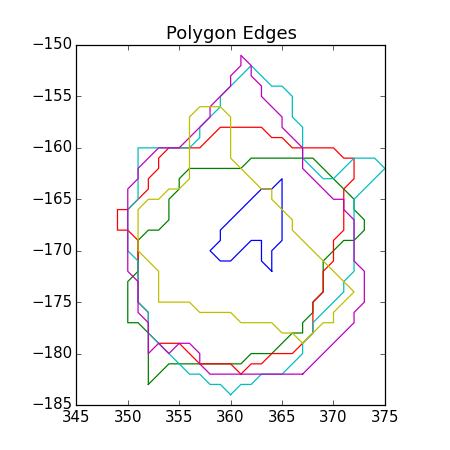

In [10]:
# loop through each slice
counter = 1
for layer in dataFrame['roiList'][nodule]:
    # make a list of coords
    coordList = []
    # loop through points
    for boundaryVoxels in layer['edgeMap']:
        coordList.append( ( boundaryVoxels['x'] , boundaryVoxels['y'] *-1 ) ) # -1 to flip the y axis
    # make polygon
    polygon = Polygon(coordList)
    # loop through x and y or array (z is already set bi big loop (counter)
    for j in range ( int(array.shape[1]) ):
        for k in range ( int(array.shape[2]) ):
            # j is y need to add and multiply by *-1
            # k is x and needs to add only
            newK = k + xMin
            newJ = (j + yMin) * -1
            #
            point = Point(newK,newJ)
            if ( polygon.contains(point) ):
                array[counter][j][k] = 1

    counter+=1
    
    #######
    x, y = polygon.exterior.xy
    fig = plt.figure(1, figsize=(5,5), dpi=90)
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_title('Polygon Edges')
    ax.set_aspect(1)

<IPython.core.display.Javascript object>


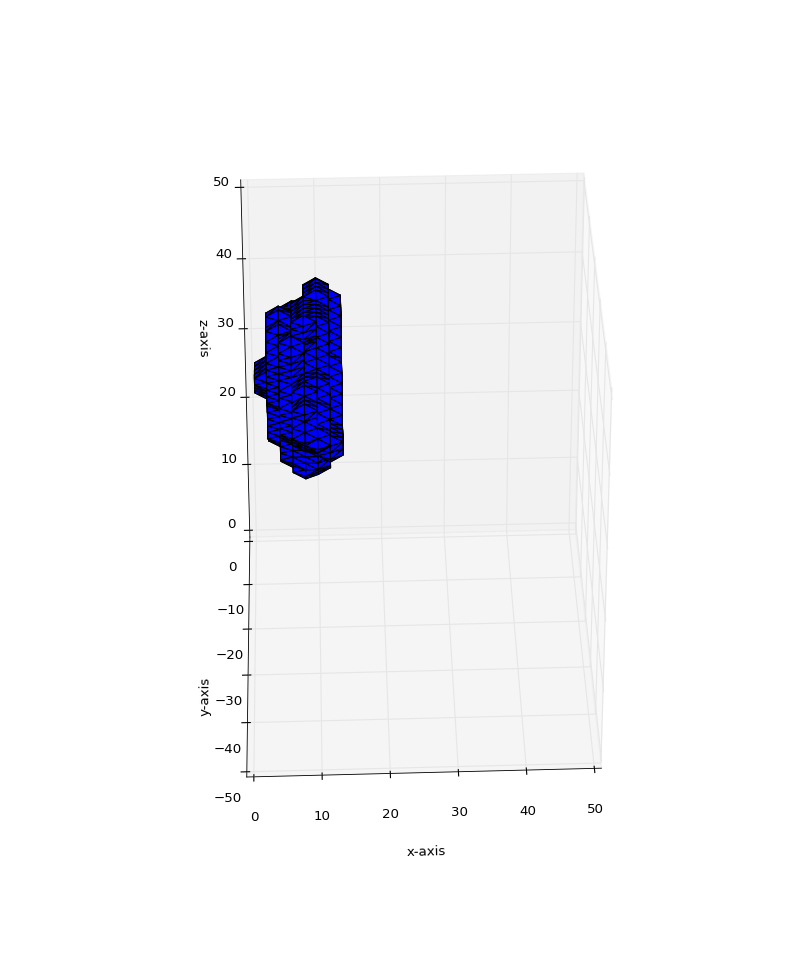

C:\Users\ahmed.ahmed-PC\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [11]:

verts, faces= measure.marching_cubes(array, level=0, spacing=(2., 1., 1.))


# # Use marching cubes to obtain the surface mesh of these ellipsoids
#  = measure.marching_cubes(array, level=0, spacing=(1.0, 1.0, 1.0), 
#                                       gradient_direction='descent', step_size=1, 
#                                       allow_degenerate=True, use_classic=False)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 12))
ax = fig.gca(projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
meshPlot = Poly3DCollection(verts[faces])
ax.add_collection3d(meshPlot)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 50)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(-50, 0)  # b = 10
ax.set_zlim(0, 50)  # c = 16

plt.show()




-check inclusion
-check voxel size
-check orientation
-nonNodule dataframe

In [12]:


# Create the mesh
cube = STLmesh.Mesh(np.zeros(faces.shape[0], dtype=STLmesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = verts[f[j],:]
  
# Write the mesh to file "cube.stl"
cube.save('cube.stl')

In [13]:
len(faces)

2320

In [14]:
import skimage
print skimage.__version__

0.12.3
